In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
#declare a base using automap_base()
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
dir(Base.classes)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 'measurement',
 'station']

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
query = session.query(Measurement)
print(query)

measurement_df = pd.read_sql('Select * from Measurement', engine)

measurement_df.head()

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

In [13]:
# Starting from the most recent data point in the database. 
most_recent_date = list(session.query(Measurement.date).order_by(Measurement.date.desc()).first())
most_recent_date
most_recent = most_recent_date[0]

In [14]:
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8 ,23) - dt.timedelta(days=365)

last_year

datetime.date(2016, 8, 23)

In [67]:
# Perform a query to retrieve the data and precipitation scores
scores = list(session.query(Measurement.date, Measurement.prcp).filter((Measurement.date > last_year) & (Measurement.date < most_recent)).all())


scores

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [68]:
# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores)

#scores_df = scores_df.set_index(['date'])

In [69]:
#df
scores_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2214,2017-08-18,NaN
2215,2017-08-19,0.09
2216,2017-08-20,NaN
2217,2017-08-21,0.56


In [70]:
# Sort the dataframe by date
sorted_df = scores_df.sort_values('date')
sorted_df.dropna()


,date,prcp
0,2016-08-24,0.08
1521,2016-08-24,2.15
701,2016-08-24,2.28
359,2016-08-24,2.15
1872,2016-08-24,1.45
...,...,...
357,2017-08-21,0.00
1003,2017-08-21,0.02
1520,2017-08-22,0.00
358,2017-08-22,0.00


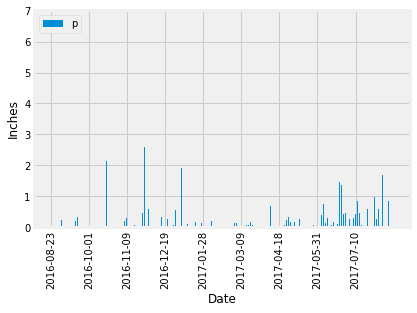

In [88]:
# Use Pandas Plotting with Matplotlib to plot the data
date = sorted_df['date']

prcp = sorted_df['prcp']

dates = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
#add title 
plt.title("")

#label xaxis
plt.xlabel("Date")

#lable yaxis
plt.ylabel("Inches")

step = len(date)/len(dates)

tickvalues = range(0,len(date),247)

#tickvalues = dates

plt.locator_params(axis = 'x', nbins = len(dates))

#adjust chart layout 
#plt.tight_layout()

plt.xticks(range(0,len(date),247), rotation = 90, labels = dates)

#create bar chart 
plt.bar(sorted_df.index, prcp,width=.5, alpha=1, align="center")

#create legend
plt.legend("precipitation", loc='best')

In [63]:
step = len(date)/len(dates)

#tickvalues = range(0,len(date),step)

step 

246.55555555555554

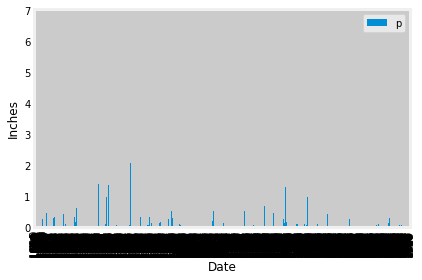

,date,prcp
0,2016-08-24,0.08
1004,2016-08-24,NaN
1521,2016-08-24,2.15
701,2016-08-24,2.28
359,2016-08-24,2.15
...,...,...
1519,2017-08-21,NaN
1003,2017-08-21,0.02
1520,2017-08-22,0.00
358,2017-08-22,0.00


In [72]:
#create bar graph 
bar_graph = sorted_df.plot.bar(width=.5, alpha=1, align="center")

#label xaxis
plt.xlabel("Date")

#lable yaxis
plt.ylabel("Inches")

plt.legend("precipitation", loc='best')

#show graph 
plt.show()

sorted_df

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sum_stat = sorted_df.describe()
sum_stat

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
station_df = pd.read_sql('Select * from Station', engine)

station_df.head(50)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [ ]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Station.station).count()

print(stations_count)

stations = list(session.query(Station.station))

print(stations)

In [89]:
stations = session.query(Station.station, Station.name).all()
stations 

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [24]:
from sqlalchemy import func

active_stations = list(session.query(Measurement.id))

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_station = list(session.query(func.count(Measurement.id)).group_by(Measurement.station))
active_station

[(1979,),
 (2709,),
 (2202,),
 (2612,),
 (1372,),
 (511,),
 (2772,),
 (2724,),
 (2669,)]

In [26]:
# List the stations and the counts in descending order.

station_count = list(session.query(Station.id, Station.station, Station.name, (func.count(Measurement.id)))
                      .filter(Measurement.station == Station.station)
                      .group_by(Measurement.station)
                      .order_by(func.count(Measurement.id).desc()))

station_count

[(7, 'USC00519281', 'WAIHEE 837.5, HI US', 2772),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 2709),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 (4, 'USC00517948', 'PEARL CITY, HI US', 1372),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#highest temp
high_temp = list(session.query(func.max(Measurement.tobs))
                 .filter(Station.id == 7)
                 .filter(Measurement.station == Station.station))
high_temp


[(85.0,)]

In [28]:
#lowest temp
low_temp = list(session.query(func.min(Measurement.tobs))
                .filter(Station.id == 7)
                .filter(Measurement.station == Station.station))
low_temp

[(54.0,)]

In [29]:
#average temp
avg_temp = list(session.query(func.avg(Measurement.tobs))
                .filter(Station.id == 7)
                .filter(Measurement.station == Station.station))
avg_temp                

[(71.66378066378067,)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_7 = list(session.query(Measurement.tobs)
              .filter((Measurement.date > last_year) & 
                      (Measurement.date < most_recent) & 
                      (Station.id == 7) & 
                      (Measurement.station == Station.station)))
station_7

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [31]:
#create df 
station_7_df = pd.DataFrame({"tobs" : station_7})

In [32]:
station_7_df.dtypes

tobs    object
dtype: object

In [33]:
#fix datatypes 
station_7_df['tobs'] = station_7_df['tobs'].astype(str)

station_7_df['tobs'] = station_7_df["tobs"].map(lambda x: x.replace("(",""))
station_7_df['tobs'] = station_7_df["tobs"].map(lambda x: x.replace(",)",""))

station_7_df['tobs'] = station_7_df['tobs'].astype(float)

station_7_df.dtypes

tobs    float64
dtype: object

Text(0.5, 0, 'Temperature')

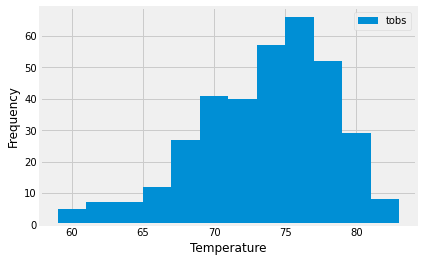

In [34]:
#plot histogram
hist_graph = station_7_df.plot.hist(bins=12)

#label xaxis
plt.xlabel("Temperature")

# Close session

In [35]:
# Close Session
session.close()